# Written by Wei Luo
## _Estimate Factor Return_ 
by R programming

In [30]:
version$version.string  # R version we use here

[1] "R version 3.1.2 (2014-10-31)"

## (a) Part 1: Overview of Data


In [31]:
setwd("C:/Baruch MFE/Portfolio Management/Lec4/apt")  # set working directory
data1 <- read.table("apt.2014-01-02.txt", sep = "|", header = T)  # load data from local file
# head(data)
# tail(data1)
# summary(data1)

## (a) Part 2: Data Processing

In [32]:
# read in all file names for loop
file_list <- list.files()

In [33]:
# This function returns f(factor returns), adjusted R square, and t value of each regression 
# Input: file_name  

result_gen <- function(file_name){
    data <- read.table(file_name, sep = "|", header = T)
    data1 <- data[c("RETNEXT", "BETA", "MOMENTUM", "SIZE", "VOL", "VALUE")]  # non-industry factor in Alphabetical order
    InformationTechnology <- data.frame(data["INDUSTRY"] == "InformationTechnology")
    Energy <- data.frame(data["INDUSTRY"] == "Energy")
    Industrials <- data.frame(data["INDUSTRY"] == "Industrials")
    HealthCare <- data.frame(data["INDUSTRY"] == "HealthCare")
    ConsumerStaples <- data.frame(data["INDUSTRY"] == "ConsumerStaples")
    Financials <- data.frame(data["INDUSTRY"] == "Financials")
    TelecommunicationServices <- data.frame(data["INDUSTRY"] == "TelecommunicationServices")
    ConsumerDiscretionary <- data.frame(data["INDUSTRY"] == "ConsumerDiscretionary")
    Materials <- data.frame(data["INDUSTRY"] == "Materials")
    Utilities <- data.frame(data["INDUSTRY"] == "Utilities")
    X <- cbind(data1, InformationTechnology, Energy, Industrials, HealthCare, ConsumerStaples, Financials, TelecommunicationServices, ConsumerDiscretionary, Materials, Utilities)
    colnames(X) <- c("RETNEXT", "BETA", "MOMENTUM", "SIZE", "VOL", "VALUE","InformationTechnology", "Energy", "Industrials", "HealthCare", "ConsumerStaples", "Financials", "TelecommunicationServices", "ConsumerDiscretionary", "Materials", "Utilities")
    X[X == TRUE] <- 1
    X[X == FALSE] <- 0
    
    
    fit <- lm(data$RETNEXT ~ 0 + X$BETA + X$MOMENTUM + X$SIZE + X$VOL + X$VALUE
                               + X$InformationTechnology 
                               + X$Energy
                               + X$Industrials
                               + X$HealthCare
                               + X$ConsumerStaples
                               + X$Financials
                               + X$TelecommunicationServices
                               + X$ConsumerDiscretionary
                               + X$Materials
                               + X$Utilities)
    f <- data.frame(t(matrix(fit$coefficients)))
    adjR <- summary(fit)$adj.r.squared
    adjR <- data.frame(adjR)
    a <- summary(fit)
    t_stats <- coef(a)[, "t value"]
    t_stats <- data.frame(t(matrix(t_stats)))
    result <- list(f, adjR, t_stats)
    return(result)
}


In [34]:
f <- data.frame()  # empty factor return and adjusted R square for non-industry factors dataframe
adjR <- data.frame()  
t_value <- data.frame()
for(file in file_list){  # for loop to read each data file
    f <- rbind(f, data.frame(result_gen(file)[1]))  # create a aggregated dataframe
    adjR <- rbind(adjR, data.frame(result_gen(file)[2]))
    t_value <- rbind(t_value, data.frame(result_gen(file)[3]))
    }

In [35]:
# rename column and row
colnames(f) <- c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE","InformationTechnology", "Energy", "Industrials", "HealthCare", "ConsumerStaples", "Financials", "TelecommunicationServices", "ConsumerDiscretionary", "Materials", "Utilities")
colnames(adjR) <- c("adjR")
colnames(t_value) <- c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE","InformationTechnology", "Energy", "Industrials", "HealthCare", "ConsumerStaples", "Financials", "TelecommunicationServices", "ConsumerDiscretionary", "Materials", "Utilities")
date <- as.Date(substr(file_list, 5, 14))
rownames(f) <- date
# summary(f)

In [36]:
cumRet <- cumprod(1 + f) - 1  # calculate cumulative return 
# summary(cumRet)

## (a) Part 3: Result

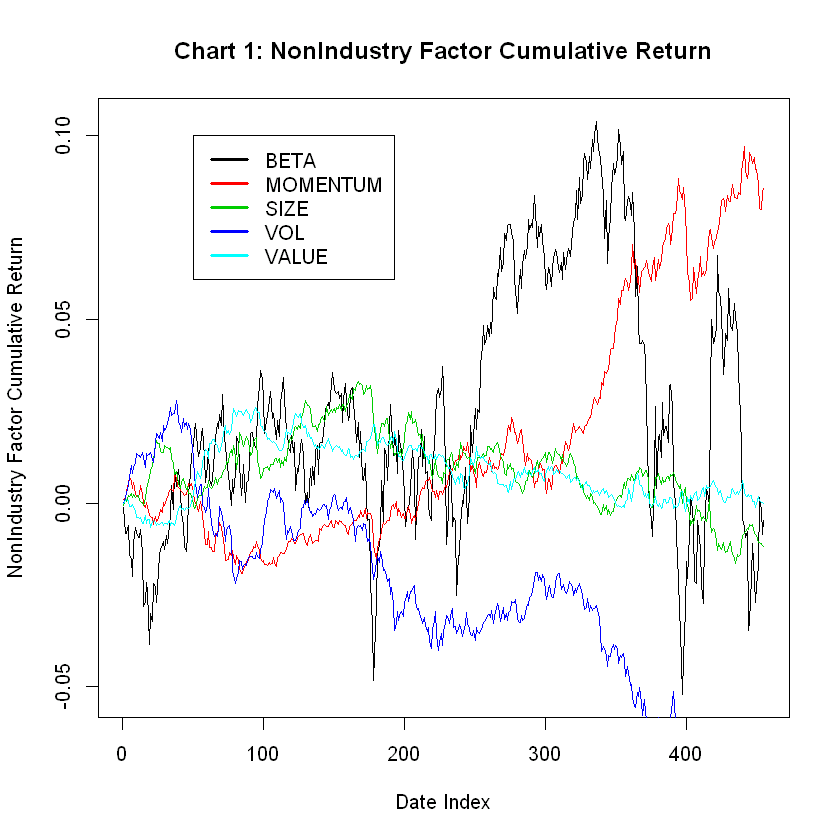

In [37]:
# par(mfrow = c(2,1))
plot(cumRet$BETA, type = "l", col = 1, xlab = "Date Index", ylab = "NonIndustry Factor Cumulative Return", main = "Chart 1: NonIndustry Factor Cumulative Return")
lines(cumRet$MOMENTUM, type = "l", col = 2)
lines(cumRet$SIZE, type = "l", col = 3)
lines(cumRet$VOL, type = "l", col = 4)
lines(cumRet$VALUE, type = "l", col = 5)

legend(50,0.1, # places a legend at the appropriate place 
       c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE"), # puts text in the legend
        lty=c(1,1), # gives the legend appropriate symbols (lines)
        lwd=c(2.5,2.5),col=c(1,2,3,4,5)) # gives the legend lines the correct color and width

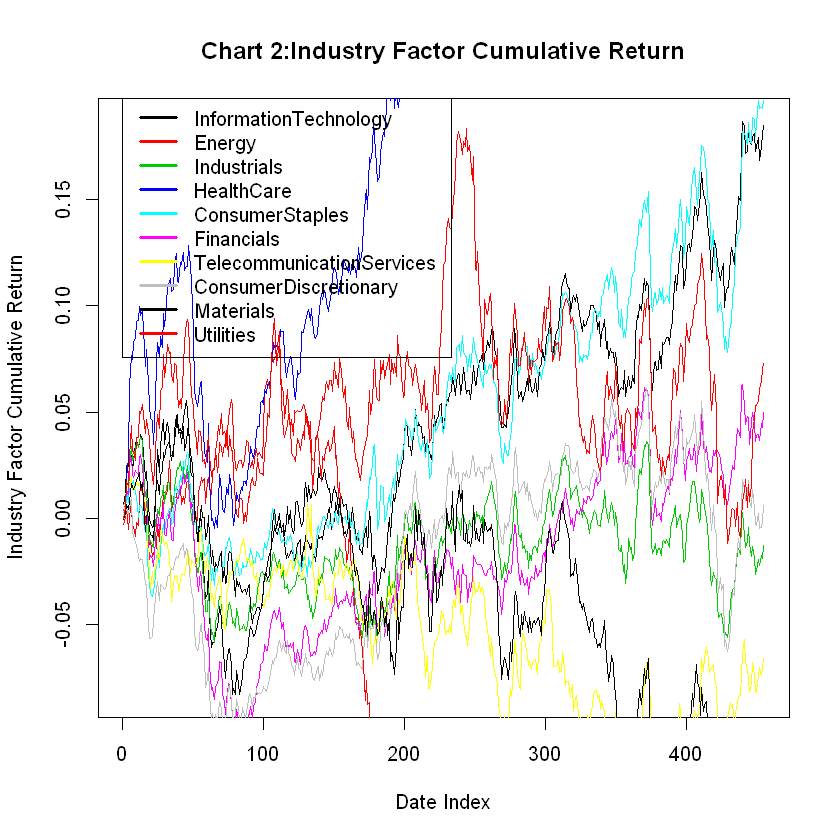

In [38]:
plot.window(c(-50,1000), c(-10, 10))
plot(cumRet$InformationTechnology, type = "l", col = 1, xlab = "Date Index", ylab = "Industry Factor Cumulative Return", main = "Chart 2:Industry Factor Cumulative Return")
lines(cumRet$Energy, type = "l", col = 2)
lines(cumRet$Industrials, type = "l", col = 3)
lines(cumRet$HealthCare, type = "l", col = 4)
lines(cumRet$ConsumerStaples, type = "l", col = 5)
lines(cumRet$Financials, type = "l", col = 6)
lines(cumRet$TelecommunicationServices, type = "l", col = 7)
lines(cumRet$ConsumerDiscretionary, type = "l", col = 8)
lines(cumRet$Materials, type = "l", col = 9)
lines(cumRet$Utilities, type = "l", col = 10)

legend(0,0.2, # places a legend at the appropriate place 
       c("InformationTechnology", "Energy", "Industrials", "HealthCare", "ConsumerStaples", "Financials", "TelecommunicationServices", "ConsumerDiscretionary", "Materials", "Utilities")
, # puts text in the legend
        lty=c(1,1), # gives the legend appropriate symbols (lines)
        lwd=c(2.5,2.5),col=c(1,2,3,4,5, 6, 7, 8, 9, 10)) # gives the legend lines the correct color and width

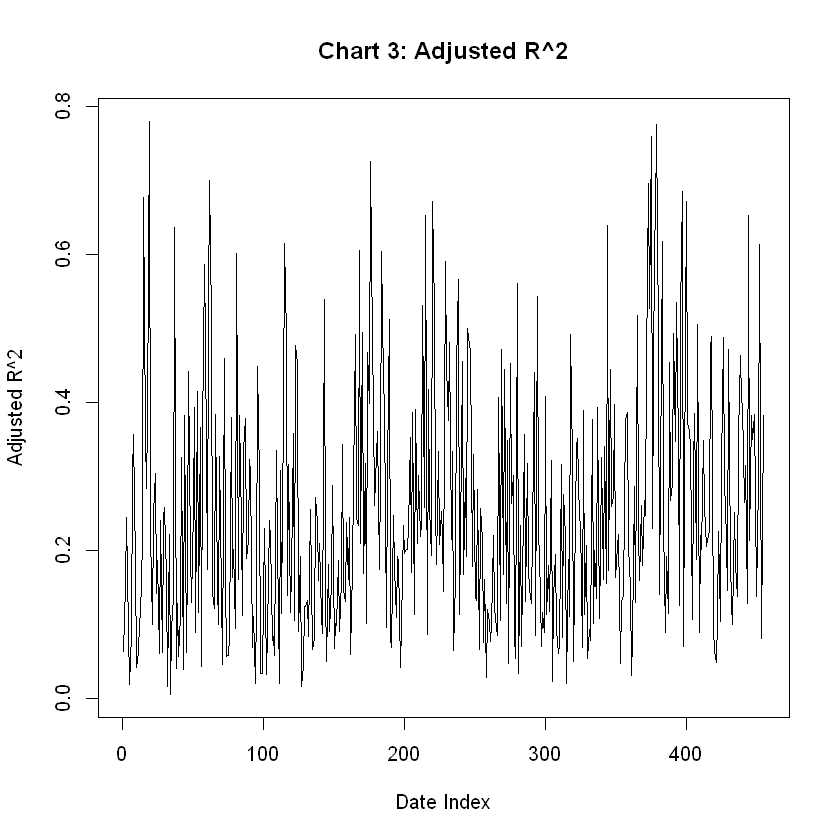

In [39]:
# plot R square of both nonindustry and industry factors
plot(adjR$adjR, type = 'l', col = 1, xlab = "Date Index", ylab = "Adjusted R^2", main = "Chart 3: Adjusted R^2")

## (b) Estimate $u_f$ and F(expectation and covariance of factor return)

In [40]:
head(f)

,BETA,MOMENTUM,SIZE,VOL,VALUE,InformationTechnology,Energy,Industrials,HealthCare,ConsumerStaples,Financials,TelecommunicationServices,ConsumerDiscretionary,Materials,Utilities
2014-01-02,-0.001066653,0.00112102,-0.0007277121,5.618867e-05,5.53751e-05,0.006704662,-0.00278527,0.006550203,0.004024777,0.002826979,0.003792154,-0.0005964837,0.002035126,-0.0005794446,0.0001269174
2014-01-03,-0.007130597,0.0002527726,0.001679467,0.001529565,0.0007278525,0.005045178,0.003199057,0.0004864033,-7.487835e-05,-0.001368949,0.002945361,0.007958684,-0.0005069634,0.00282741,0.005249811
2014-01-06,-0.0001286194,0.001825509,-0.0004036771,0.001162891,0.0003108631,0.01301431,0.004115112,0.006682967,0.01479745,0.01145051,0.006260667,0.008938201,0.003826739,0.004270837,0.01208585
2014-01-07,0.002272511,0.002249169,0.001610502,0.00224676,-0.0004429864,-0.0006394726,-0.009849781,-0.002692611,0.009423192,-0.005113122,-0.001624986,0.001544372,-0.003399841,-0.002396771,-0.001904931
2014-01-08,-0.007959774,0.001874727,-0.0001943795,0.002133039,-0.001568217,0.0031394,0.006421253,0.01315627,0.03312212,0.008816657,0.01442744,-0.003477882,0.002994316,0.004062664,0.0127591
2014-01-09,-0.0009419303,-0.001425937,0.0006384107,0.003072906,0.0001597881,0.002227168,0.006929375,0.009403549,0.01335831,0.002526348,0.002639155,0.005138381,0.004955451,0.008188431,0.0146346


In [41]:
f_100 <- f[c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE")] * 100
head(f_100)

,BETA,MOMENTUM,SIZE,VOL,VALUE
2014-01-02,-0.1066653,0.112102,-0.07277121,0.005618867,0.00553751
2014-01-03,-0.7130597,0.02527726,0.1679467,0.1529565,0.07278525
2014-01-06,-0.01286194,0.1825509,-0.04036771,0.1162891,0.03108631
2014-01-07,0.2272511,0.2249169,0.1610502,0.224676,-0.04429864
2014-01-08,-0.7959774,0.1874727,-0.01943795,0.2133039,-0.1568217
2014-01-09,-0.09419303,-0.1425937,0.06384107,0.3072906,0.01597881


In [59]:
u_f <- apply(f_100,2,mean)  # calculate mean by columns
F <- cov(f_100)
u_f[1]
u_f[2]
u_f[3]
u_f[5]
u_f[4]  # in Alphabetical order

BETA 
0.001946139

MOMENTUM 
0.01831299

SIZE 
-0.002422402

VALUE 
4.450825e-05

VOL 
-0.02102545

In [43]:
F  # covariance of factor return 

,BETA,MOMENTUM,SIZE,VOL,VALUE
BETA,0.5925674889,0.0009594027,-0.0268500124,0.0257584322,-0.0096061938
MOMENTUM,0.0009594027,0.0508716334,0.0018453765,-0.0045960888,-0.0084520362
SIZE,-0.026850012,0.001845377,0.032139205,0.013703588,0.001096668
VOL,0.025758432,-0.004596089,0.013703588,0.066914033,-0.012372256
VALUE,-0.009606194,-0.008452036,0.001096668,-0.012372256,0.016623224


In [44]:
cor(f_100)  # here we also want to see correlation matrix here

,BETA,MOMENTUM,SIZE,VOL,VALUE
BETA,1.000000000,0.005525787,-0.194561998,0.129357589,-0.096788732
MOMENTUM,0.005525787,1.000000000,0.045638314,-0.078775645,-0.290647019
SIZE,-0.19456200,0.04563831,1.00000000,0.29550044,0.04744606
VOL,0.12935759,-0.07877565,0.29550044,1.00000000,-0.37096476
VALUE,-0.09678873,-0.29064702,0.04744606,-0.37096476,1.00000000


## (c) T-Test in Non-Industry Factors

In [45]:
a <- summary(t_value)
abs_t <- abs(t_value)
b <- summary(abs_t)
b

      BETA             MOMENTUM              SIZE                VOL          
 Min.   : 0.03151   Min.   : 0.007372   Min.   : 0.009132   Min.   : 0.01368  
 1st Qu.: 1.46567   1st Qu.: 1.418861   1st Qu.: 1.140509   1st Qu.: 1.39668  
 Median : 2.98568   Median : 2.985814   Median : 2.440911   Median : 2.94245  
 Mean   : 3.49339   Mean   : 3.671207   Mean   : 2.845171   Mean   : 3.37624  
 3rd Qu.: 4.83004   3rd Qu.: 5.255458   3rd Qu.: 4.125612   3rd Qu.: 4.56429  
 Max.   :14.34594   Max.   :16.295092   Max.   :14.084172   Max.   :13.25006  
     VALUE          InformationTechnology     Energy        
 Min.   :0.002663   Min.   : 0.000652     Min.   : 0.02619  
 1st Qu.:0.803198   1st Qu.: 1.013485     1st Qu.: 1.34961  
 Median :1.823354   Median : 1.980776     Median : 3.07624  
 Mean   :2.053504   Mean   : 2.459259     Mean   : 3.89733  
 3rd Qu.:2.961124   3rd Qu.: 3.458371     3rd Qu.: 5.77625  
 Max.   :8.616751   Max.   :10.618505     Max.   :19.61174  
  Industrials       

**For 99% confidence interval for each regression sample size n = 2000, the t value is around 2.576**   
Reference:http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf   
From the summary above, we extract non-zero features when absoute t value  ** mean and median **  is larger than 2.576   
1. If the factor satifay both, we define it as significant factors
2. If the factor satifay either, we define it as semi-significant factors
3. If the factor satifay both, we define it as nonsignificant factors

** Non-zero Factors:**     

1. Significant: BETA, MOMENTUM, VALUE, Energy, HealthCare
2. Semi-significant: SIZE, Materials, Utilities
3. Non-significant: VOL, InformationTechnology, Industrials, ConsumerStaples, Financials, TelecommunicationServices, ConsumerDiscretionary


## (d) Optimal Holdings h and PnL  = h * R  

In [60]:
full_uf <- apply(f, 2, mean)  # here we use original uf, not 100 times larger
full_F <- cov(f)  # original covariance, not 100^2 times larger one
# full_uf  # this is a 100 times larger version

In [61]:
full_F
# uf

,BETA,MOMENTUM,SIZE,VOL,VALUE,InformationTechnology,Energy,Industrials,HealthCare,ConsumerStaples,Financials,TelecommunicationServices,ConsumerDiscretionary,Materials,Utilities
BETA,5.925675e-05,9.594027e-08,-2.685001e-06,2.575843e-06,-9.606194e-07,-5.964101e-06,2.027298e-05,-3.506093e-06,-2.047395e-06,-1.045171e-05,-3.257824e-06,-2.185249e-06,-8.694221e-06,-1.007506e-05,-1.435593e-05
MOMENTUM,9.594027e-08,5.087163e-06,1.845377e-07,-4.596089e-07,-8.452036e-07,2.611435e-06,-1.305540e-05,1.338079e-07,6.215071e-06,5.171171e-07,1.749270e-06,-7.841396e-07,1.598647e-06,-5.619293e-06,-4.210655e-09
SIZE,-2.685001e-06,1.845377e-07,3.213920e-06,1.370359e-06,1.096668e-07,1.091190e-06,1.935715e-06,6.369243e-07,1.952187e-06,9.449088e-07,7.773616e-08,4.541860e-07,1.403078e-06,3.199365e-06,2.766175e-06
VOL,2.575843e-06,-4.596089e-07,1.370359e-06,6.691403e-06,-1.237226e-06,4.836123e-06,1.129036e-05,4.400169e-06,1.128395e-05,2.264689e-06,5.374352e-06,2.983216e-06,3.355967e-06,9.449264e-06,5.877205e-06
VALUE,-9.606194e-07,-8.452036e-07,1.096668e-07,-1.237226e-06,1.662322e-06,-1.084509e-06,3.063484e-06,1.810849e-07,-3.058969e-06,4.675519e-07,-8.062174e-07,2.702004e-07,-2.803711e-07,9.749938e-07,-9.978626e-07
InformationTechnology,-5.964101e-06,2.611435e-06,1.091190e-06,4.836123e-06,-1.084509e-06,4.524425e-05,1.498813e-05,3.234739e-05,3.056104e-05,2.794191e-05,3.235785e-05,2.766319e-05,3.154399e-05,3.496288e-05,2.672880e-05
Energy,2.027298e-05,-1.305540e-05,1.935715e-06,1.129036e-05,3.063484e-06,1.498813e-05,1.793263e-04,2.840046e-05,5.596884e-06,2.112980e-05,1.965057e-05,2.726384e-05,1.629541e-05,6.329135e-05,3.732998e-05
Industrials,-3.506093e-06,1.338079e-07,6.369243e-07,4.400169e-06,1.810849e-07,3.234739e-05,2.840046e-05,3.817068e-05,2.766631e-05,2.892076e-05,3.188209e-05,2.562557e-05,3.114753e-05,4.197528e-05,2.994249e-05
HealthCare,-2.047395e-06,6.215071e-06,1.952187e-06,1.128395e-05,-3.058969e-06,3.056104e-05,5.596884e-06,2.766631e-05,7.619636e-05,2.847394e-05,3.438253e-05,2.178275e-05,2.921784e-05,3.012187e-05,3.421662e-05
ConsumerStaples,-1.045171e-05,5.171171e-07,9.449088e-07,2.264689e-06,4.675519e-07,2.794191e-05,2.112980e-05,2.892076e-05,2.847394e-05,4.070136e-05,2.849496e-05,2.449136e-05,3.057716e-05,3.617810e-05,3.455007e-05


In [62]:
X_gen <- function(file_name){
    data <- read.table(file_name, sep = "|", header = T)
    data1 <- data[c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE")]  # non-industry factor in Alphabetical order
    InformationTechnology <- data.frame(data["INDUSTRY"] == "InformationTechnology")
    Energy <- data.frame(data["INDUSTRY"] == "Energy")
    Industrials <- data.frame(data["INDUSTRY"] == "Industrials")
    HealthCare <- data.frame(data["INDUSTRY"] == "HealthCare")
    ConsumerStaples <- data.frame(data["INDUSTRY"] == "ConsumerStaples")
    Financials <- data.frame(data["INDUSTRY"] == "Financials")
    TelecommunicationServices <- data.frame(data["INDUSTRY"] == "TelecommunicationServices")
    ConsumerDiscretionary <- data.frame(data["INDUSTRY"] == "ConsumerDiscretionary")
    Materials <- data.frame(data["INDUSTRY"] == "Materials")
    Utilities <- data.frame(data["INDUSTRY"] == "Utilities")
    X <- cbind(data1, InformationTechnology, Energy, Industrials, HealthCare, ConsumerStaples, Financials, TelecommunicationServices, ConsumerDiscretionary, Materials, Utilities)
    colnames(X) <- c("BETA", "MOMENTUM", "SIZE", "VOL", "VALUE","InformationTechnology", "Energy", "Industrials", "HealthCare", "ConsumerStaples", "Financials", "TelecommunicationServices", "ConsumerDiscretionary", "Materials", "Utilities")
    X[X == TRUE] <- 1
    X[X == FALSE] <- 0
    return(X)
}

In [79]:
# install.packages("MASS")
library("MASS")
uf_matrix <- as.matrix(full_uf)
calculate_h <- function(D1, D2, X){  # function to calculate optimal holdings
     
    X <- X_gen(file)
    X <- as.matrix(X)
    mat2 <- ginv(t(X) %*% D1)
    mat3 <- ginv(full_F + ginv(t(X) %*% D2 %*% X))
    h <- 1e4 * D1 %*% mat2 %*% mat3 %*% uf_matrix
    return(h)
}


In [80]:
# Initialization
D1 <- 0.03 ^ (-1) * diag(2000)  # D^(-0.5)
D2 <- 0.0009 ^ (-1) * diag(2000)  # D^(-1)
h <- matrix(, nrow = 2000, ncol = 1)

In [81]:
end = 0
for(file in file_list){
    X <- X_gen(file)
    now = proc.time()  # start timing
    h_new <- calculate_h(D1, D2, X)
    end = end + proc.time() - now
    h <- cbind(h, h_new)
}

In [71]:
# validation
# X <- X_gen("apt.2014-01-02.txt")
# h_test <- calculate_h(D1, D2, X)
# dim(h_test)
# h_test

In [82]:
print(end)  # time needed to calculate optimal holding

   user  system elapsed 
 124.92    0.20  125.65 


** <font color = red>Time to compute optimal holdings is as above **

In [83]:
ret_gen <- function(file_name){
    
    data <- read.table(file_name, sep = "|", header = T)
    retnext <- data["RETNEXT"] 
    return(as.matrix(retnext))
} 

In [84]:
RETNEXT <- matrix(, nrow = 2000, ncol = 1)
for(file in file_list){
    RETNEXT_new <- ret_gen(file)
    RETNEXT <- cbind(RETNEXT, RETNEXT_new)
    }

In [85]:
# head(h) 

In [86]:
PnL <- t(h) %*% RETNEXT

In [87]:
daily_PnL = data.frame()
for (i in c(2:456)){
    daily_PnL = rbind(daily_PnL, PnL[i, i])  # assuming daily rebalance
}

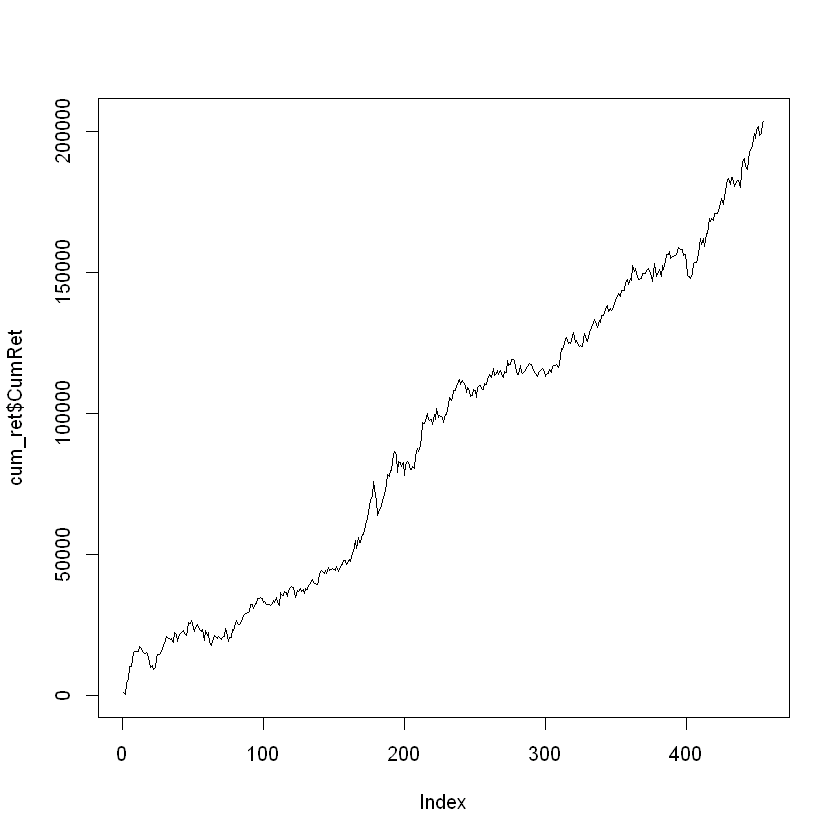

In [88]:
cum_ret <- cumsum(daily_PnL)
colnames(cum_ret) <- c("CumRet")
plot(cum_ret$CumRet, type = "l")

** Written by Wei Luo @ 2019**